## Visuals

I'll try to keep things a bit cleaner and designate this notebook to play around.

Note to assume everything is about the training data unless otherwise noted.

Furthermore, the cedas are meant for explanations; here I'll just be focusing on visuals (albeit including titles and the like).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/train.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('.', '')
print(df.shape)
df.head()

(76518, 38)


,id,marital_status,application_mode,application_order,course,daytime/evening_attendance,previous_qualification,previous_qualification_(grade),nacionality,mother's_qualification,...,curricular_units_2nd_sem_(credited),curricular_units_2nd_sem_(enrolled),curricular_units_2nd_sem_(evaluations),curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),unemployment_rate,inflation_rate,gdp,target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [3]:
df['target'].value_counts()

target
Graduate    36282
Dropout     25296
Enrolled    14940
Name: count, dtype: int64

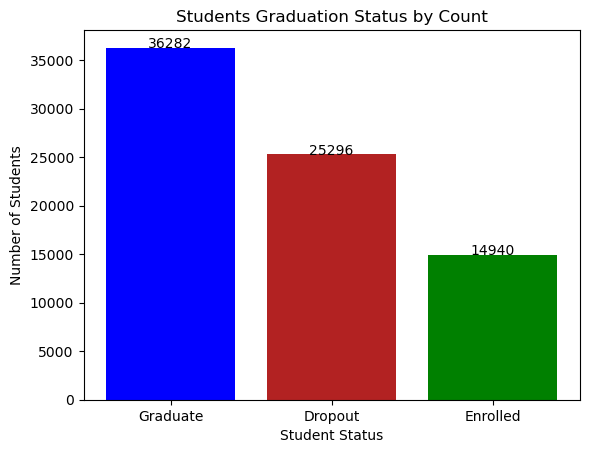

In [4]:
x = df['target'].unique()
height = df['target'].value_counts()
colors = ['blue', 'firebrick', 'green']

plot_title = 'Students Graduation Status by Count'
xlab = 'Student Status' 
ylab = 'Number of Students'

plt.bar(x, height, color=colors)

#Sigh, I was hoping there'd be a cleaner way than this. Thanks ChatGPT for finding it.
for i in range(len(x)):
    plt.text(x[i], height[i] + 0.1, str(height[i]), ha='center')

plt.title(plot_title)
plt.xlabel(xlab)
plt.ylabel(ylab);
#Yeah that red... hence a more toned down 'firebrick' instead
# #https://matplotlib.org/stable/gallery/color/named_colors.html

#Hmm, bother to put a legend? Eh, when we already have the categories below...

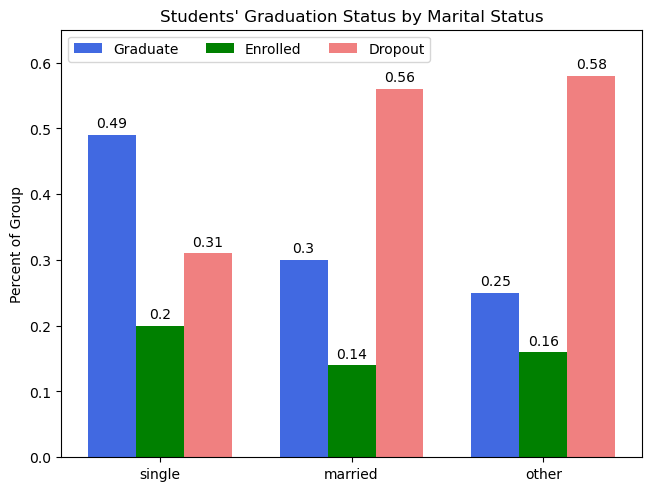

In [34]:
#Hmm, let's do a marital status look next (this coder is quite interested for various personal reasonns)

df['marital_2'] = [3 if i != 1 and i != 2  else i for i in df['marital_status']]
# print(df['marital_2'].value_counts(normalize=True))

#Thanks to Jezarel from Stackoverflow (glad to finally be back there)
df2 = df.groupby(['marital_2', 'target']).size().reset_index(name='group_count')
a = df2.groupby('marital_2')['group_count'].transform('sum')
df2['group_count'] = df2['group_count'].div(a)
# print(df2['group_count'])

#Based upon Matpyplot's example [and thanks to ChatGPT...re. the help on the colors to cycle through them]

status = ('single', 'married', 'other')
status_target_percentages = {
    'Graduate': (round(df2['group_count'].iloc[2::3], 2)),
    'Enrolled': (round(df2['group_count'].iloc[1::3], 2)),
    'Dropout': (round(df2['group_count'].iloc[::3], 2)),
}
colors = ['royalblue', 'green', 'lightcoral']
x = np.arange(len(status))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in status_target_percentages.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=colors[multiplier])
    ax.bar_label(rects, padding=3)
    multiplier += 1

plot_title = "Students' Graduation Status by Marital Status"
ylab = 'Percent of Group'

ax.set_ylabel(ylab)
ax.set_title(plot_title)
ax.set_xticks(x + width, status)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, .65);

2    0.49
5    0.30
8    0.25
Name: group_count, dtype: float64

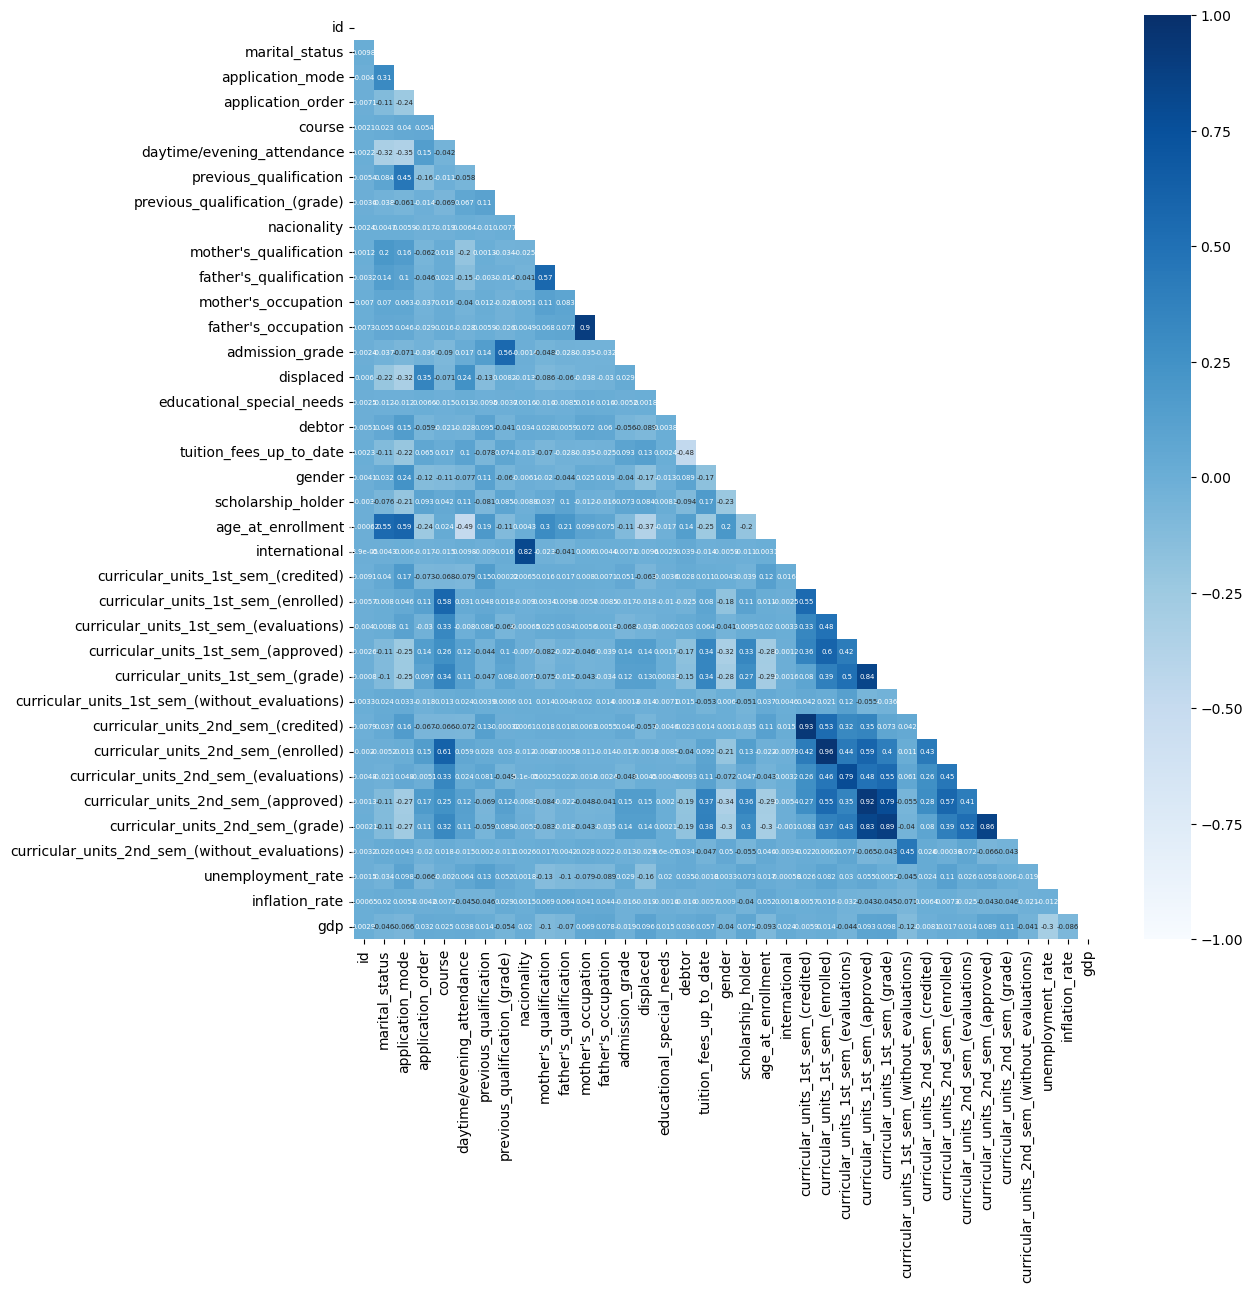

In [6]:
#Bringing over the old heatmap for all of the variables.

plt.figure(figsize=(12, 12))
corr = df.corr(numeric_only=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, annot=True, vmin = -1, vmax = 1, cmap='Blues', annot_kws={'fontsize':5});